# Analysis of Lagos State, Nigeria - Moja Global 2023

### by Eradiri Perekule

Lagos State, Nigeria, located at approximately 6.5244° N latitude and 3.3792° E longitude, is a coastal area known for its robust economy and diverse urban population. However, it faces environmental challenges, such as coastal erosion and flooding (Oyegun et al., 2018).

Lagos is one of the 36 states in Nigeria. It is not only a state but also the largest city in Nigeria, serving as the country's economic and cultural hub. Lagos State holds a prominent place in Nigeria's political and economic landscape, making it a critical component of the nation's administrative and governance structure

The biodiversity in Lagos State is characterized by Guinea forests of West Africa. It features subtropical moist and tropical dry forests, but urbanization has significantly impacted its ecosystem, resulting in a loss of natural habitats (Ogundele et al., 2020).

Lagos State falls within the tropical rainforest climate zone, exhibiting a Tropical Wet-Dry (Aw) Köppen climate classification with distinct wet and dry seasons (Eduvie et al., 2015). Its environment doesn't fit precisely into a specific Holdridge life zone.

The agroecological and ecological zones in Lagos State are primarily influenced by its tropical climate and urban landscape. Agriculture is limited due to extensive urban development (Adejuwon, 2007).

The soil resources in Lagos State are classified as acrisol

### Import libraries

In [2]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
#plt.rcParams.update({'figure.max_open_warning': 0})

### import dataset

In [3]:
gaez= gpd.read_file("GlobalAgroEcologicalZones_GAEZ.geojson")
nig_roadaccess = gpd.read_file("nig_roadaccess.geojson")
biohotspot = gpd.read_file("CI_BiodiversityHotspots.geojson")
lifezones = gpd.read_file("HoldridgeLifeZones.json")
climatezone = gpd.read_file("IPCC_ClimateZoneMap_Vector.geojson")
nig_gez= gpd.read_file("NGA_AL2_Nigeria_GEZ.json")
nig_wsr= gpd.read_file("NGA_AL2_Nigeria_WSR.json")
nig_boundary = gpd.read_file("NGA_ALL_states.json")
lg_boundary = gpd.read_file("NGA_AL4_Lagos.json")

### Administrative Boundaries

Nigeria, situated in West Africa, is a diverse and populous nation comprising 36 states. Its geographical location, cultural richness, and administrative divisions make it a significant player in the African continen

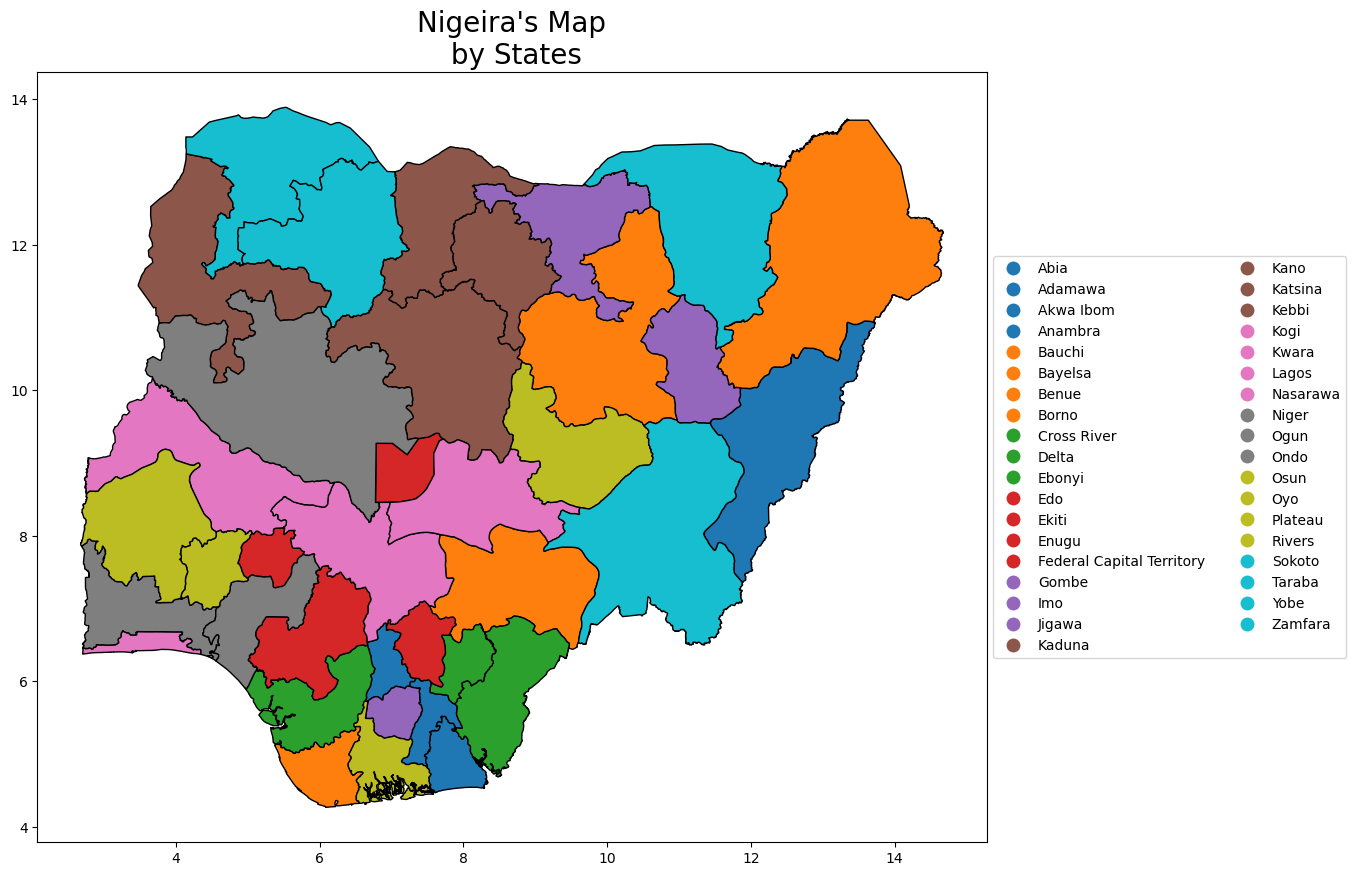

In [4]:
ax = nig_boundary.plot(figsize=(20,10), column= 'name', cmap= 'tab10', 
                   edgecolor= 'black', legend= True, 
                   legend_kwds={'loc': 'center left', 'ncol': 2, 'bbox_to_anchor':(1,0.5)})
ax.set_title("Nigeira's Map\n by States", fontsize=20)
plt.show()

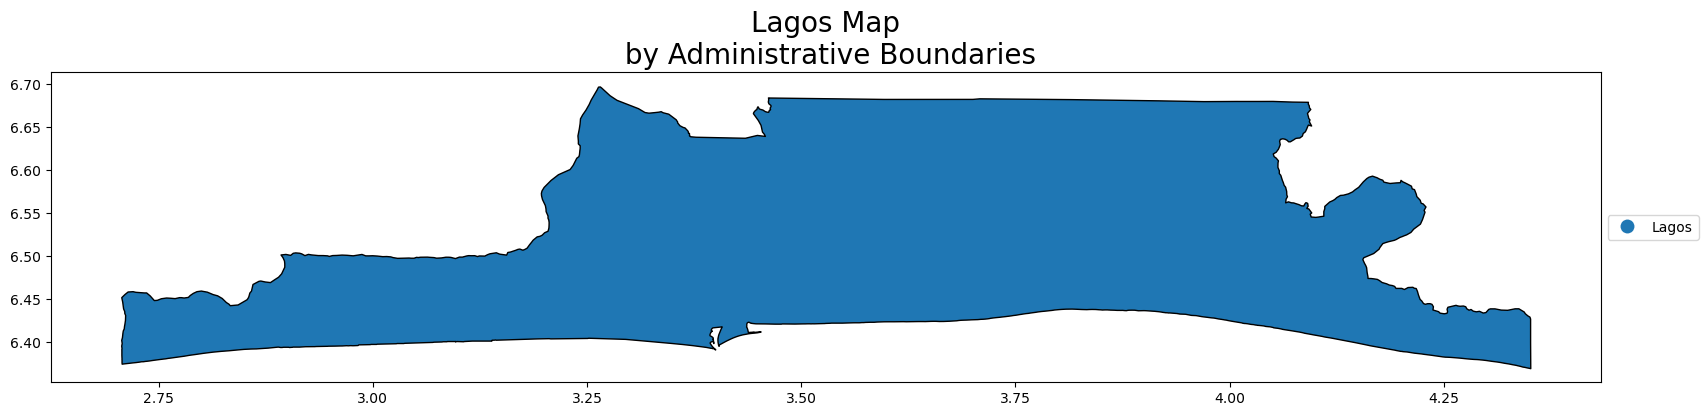

In [5]:
ax = lg_boundary.plot(figsize=(20,10), column= 'name', cmap= 'tab10', 
                   edgecolor= 'black', legend= True, 
                   legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_title('Lagos Map\n by Administrative Boundaries', fontsize=20)
plt.show()

>  Lagos state covers an area of approximately 3,577 square kilometers (1,380 square miles). it is located in the southwestern part of Nigeria along the Gulf of Guinea coast, and it is bordered by the Atlantic Ocean to the south. The state's geographical location as a coastal region has contributed to its economic significance and development as a major port city and economic center in Nigeria

### Biodiveristy Hotspot

In [6]:
#defining the dataset
# Clip the "biohotspot" dataset to the boundaries of Nigeria to create Nigeria Biodiversity hotspot and lagos.
nig_biohotspot = biohotspot.clip(nig_boundary)
lg_biohotspot = nig_biohotspot.clip(lg_boundary)

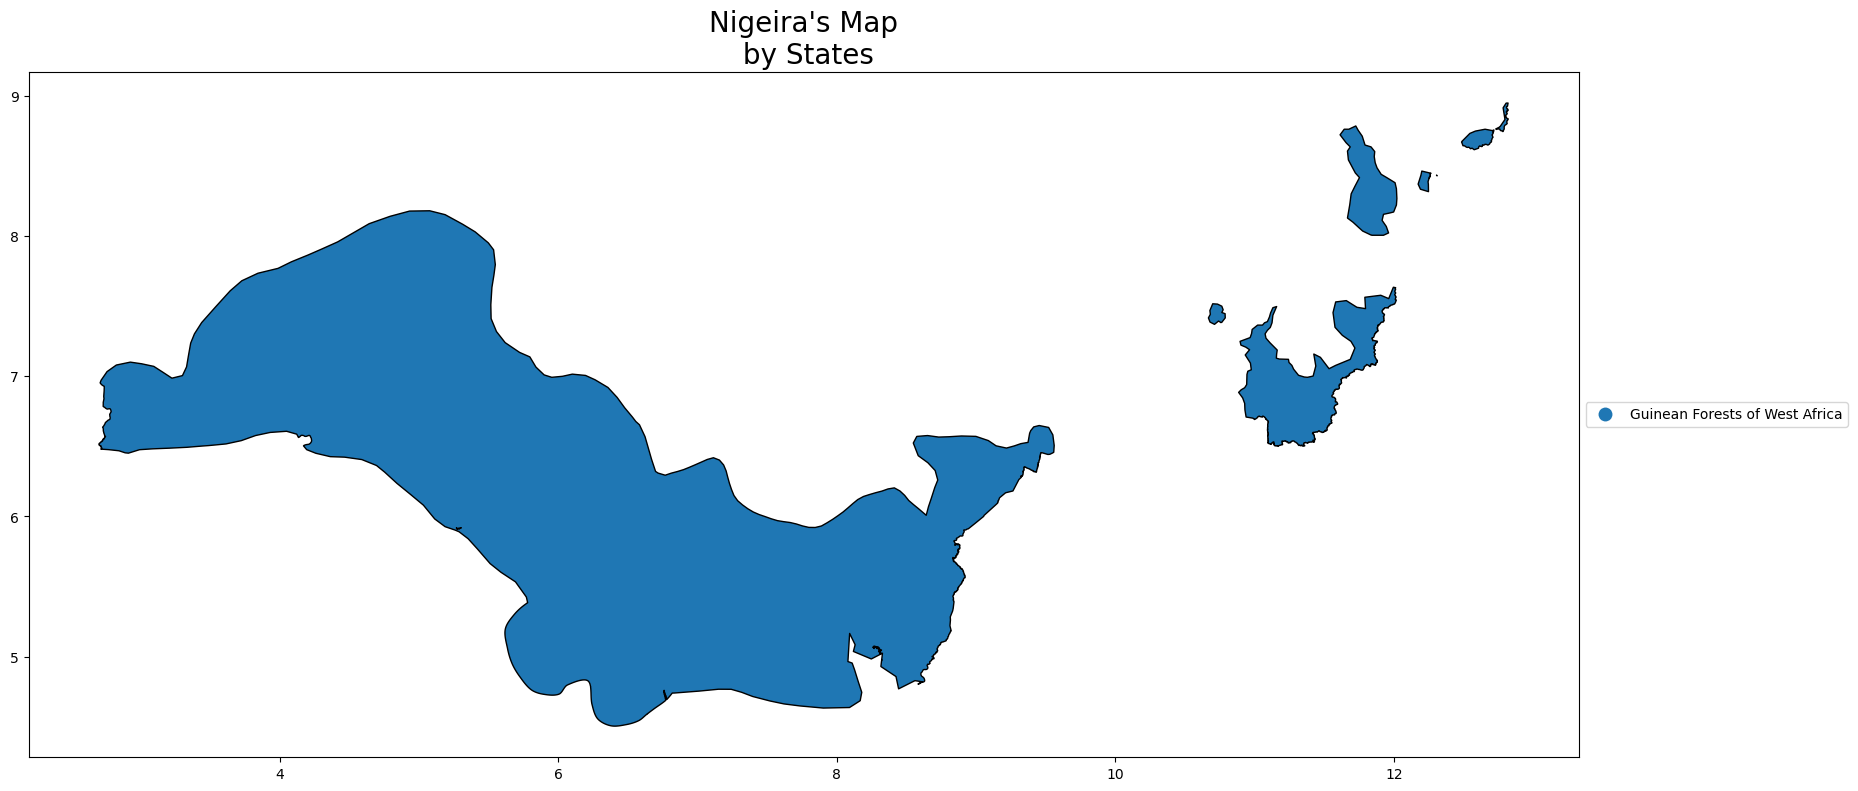

In [7]:
ax = nig_biohotspot.plot(figsize=(20,10), column= 'NAME', cmap= 'tab10', 
                   edgecolor= 'black', legend= True, 
                   legend_kwds={'loc': 'center left', 'ncol': 2, 'bbox_to_anchor':(1,0.5)})
ax.set_title("Nigeira's Map\n by States", fontsize=20)
plt.show()

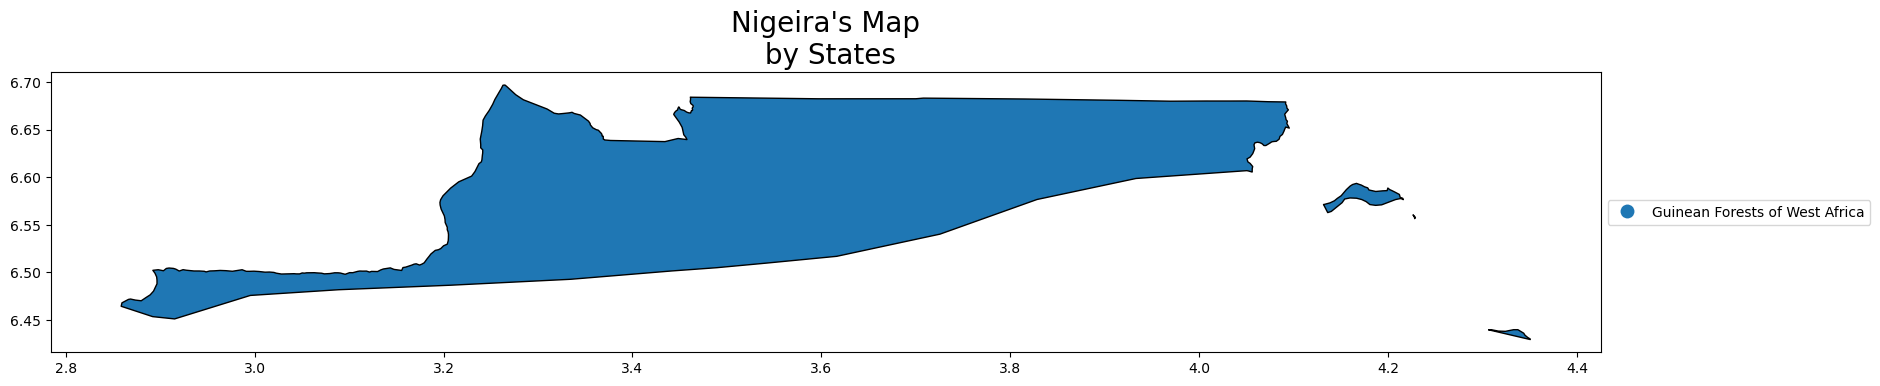

In [8]:
ax = lg_biohotspot.plot(figsize=(20,10), column= 'NAME', cmap= 'tab10', 
                   edgecolor= 'black', legend= True, 
                   legend_kwds={'loc': 'center left', 'ncol': 2, 'bbox_to_anchor':(1,0.5)})
ax.set_title("Nigeira's Map\n by States", fontsize=20)
plt.show()

>Lagos State is renowned for harboring the Guinea Forest of West Africa

### Holdridge lifezone

In [9]:
#defining the dataset
nig_lifezone = lifezones.clip(nig_boundary)
lg_lifezone = nig_lifezone.clip(lg_boundary)

In [10]:
#cleaning the dataset
nig_lifezone = nig_lifezone[nig_lifezone['SYMBOL'] != 0]

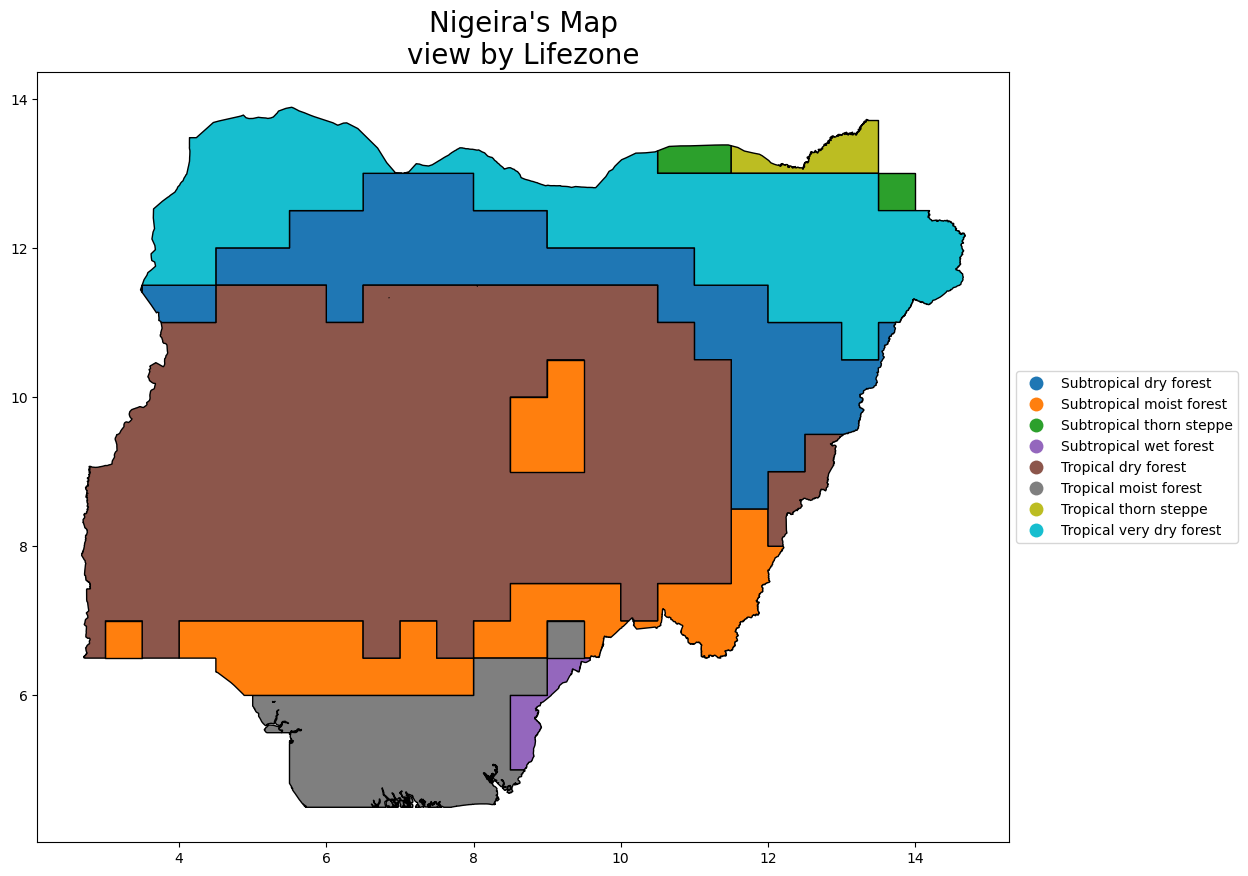

In [11]:
ax = nig_lifezone.plot(figsize=(20,10), column= 'DESC', cmap= 'tab10', 
                   edgecolor= 'black', legend= True, 
                   legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_title("Nigeira's Map\nview by Lifezone", fontsize=20)
plt.show()

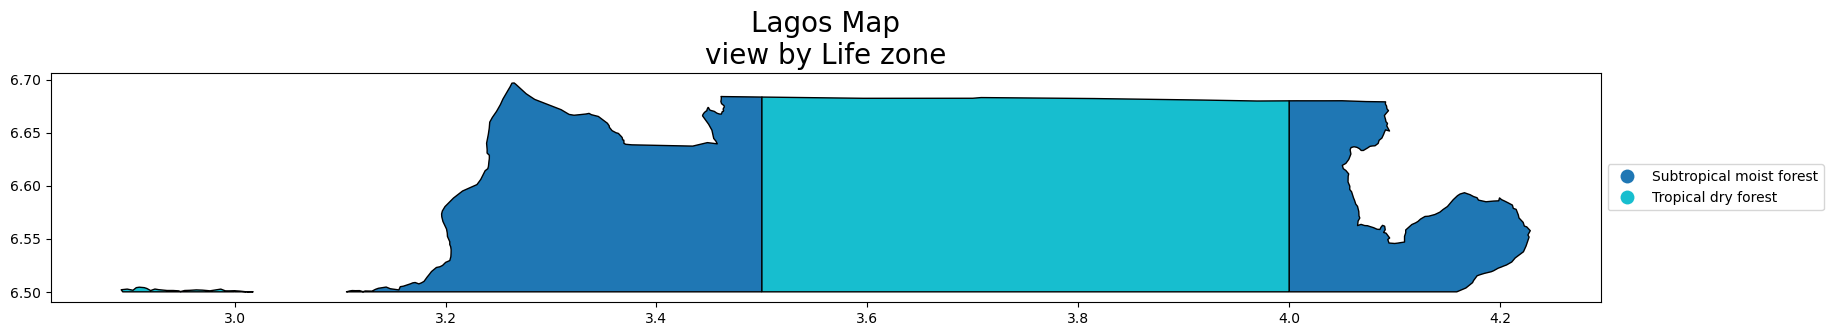

In [12]:
ax = lg_lifezone.plot(figsize=(20,10), column= 'DESC', cmap= 'tab10', 
                   edgecolor= 'black', legend= True, 
                   legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_title("Lagos Map\nview by Life zone", fontsize=20)
plt.show()

> Lagos is characterized by two distinct life zones: the subtropical moist forest and the tropical dry forest.

### Climate Zone

In [13]:
classification =  {'1': 'Tropical montane', '2' : 'Tropical wet', 
                   '3': 'Tropical moist', '4': 'Tropical dry', 
                   '5': 'Warm temperate moist', '6': 'Warm temperate dry',
                   '7': 'Cool temperate moist', '8': 'Cool temperate dry',
                   '9': 'Boreal moist', '10': 'Boreal dry', '11' : 'Polar moist',
                   '12': 'Polar dry'}


# renaming class_name
climatezone.CLASS_NAME = climatezone.CLASS_NAME.astype('str').replace(classification)

# removing oceans
climatezone =  climatezone.loc[climatezone.CLASS_NAME != '0']

In [14]:
nig_climatezone = climatezone.clip(nig_boundary)
lg_climatezone = nig_climatezone.clip(lg_boundary)

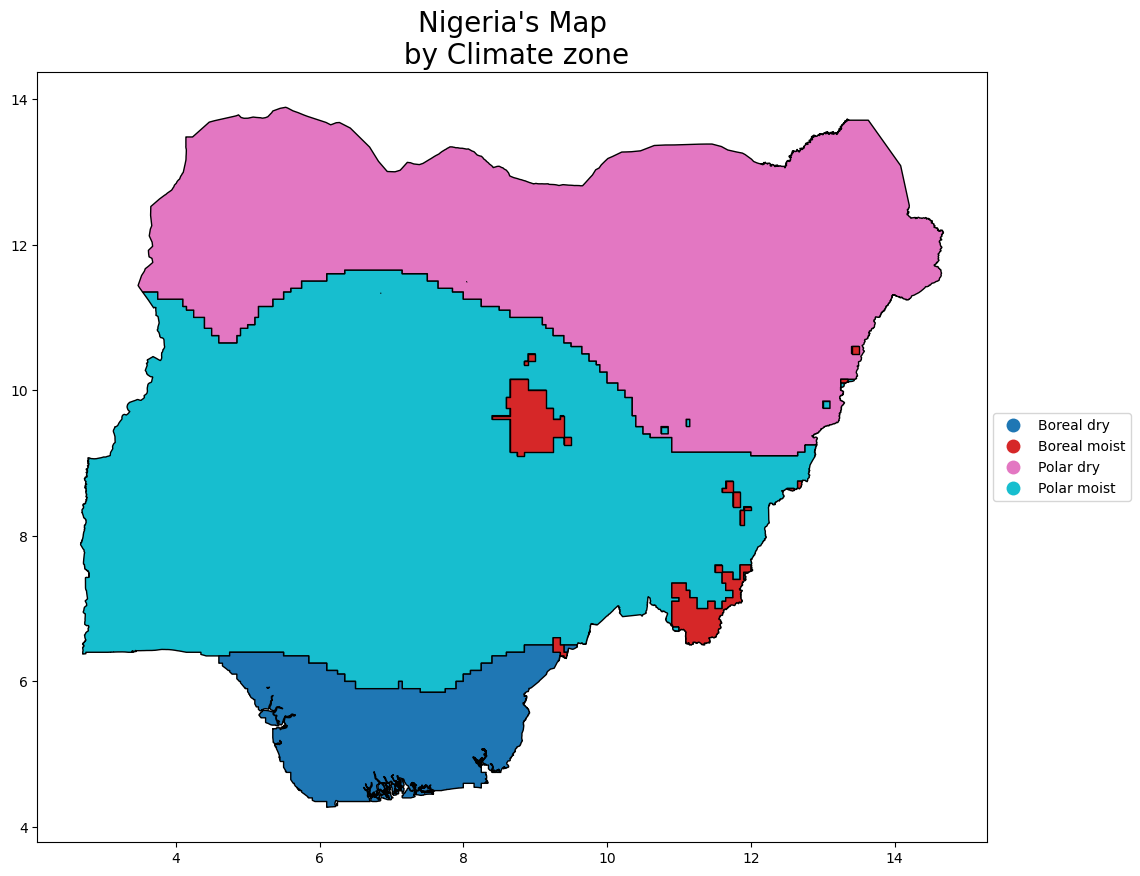

In [15]:
ax = nig_climatezone.plot(figsize=(20,10), column= 'CLASS_NAME', cmap= 'tab10', 
                   edgecolor= 'black', legend= True, 
                   legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_title("Nigeria's Map\n by Climate zone", fontsize=20)
plt.show()

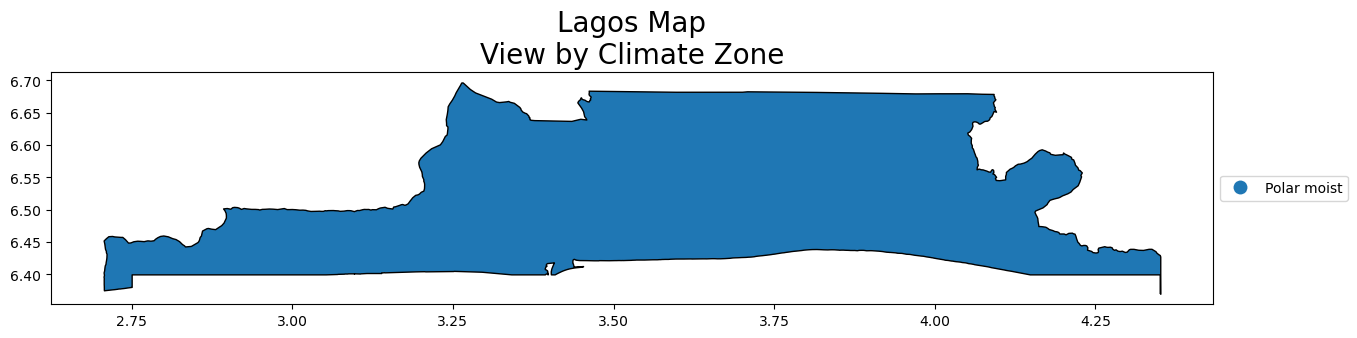

In [16]:
ax = lg_climatezone.plot(figsize=(15,5), column= 'CLASS_NAME', cmap= 'tab10', 
                   edgecolor= 'black', legend= True, 
                   legend_kwds={'loc': 'center left', 'ncol': 2, 'bbox_to_anchor':(1,0.5)})
ax.set_title('Lagos Map\nView by Climate Zone', fontsize=20)
plt.show()

In [17]:
# fixing the data
data = {'1': 'Steep terrain', '2': 'Artic/Cold', '3': 'Desert/Arid', 
          '4': 'Irrigated Soils', '5': 'Hydromorphic soils', 
          '6': 'Dry, good soils', '7': 'Dry, moderate soils', '8': 'Dry, poor soils', 
          '9': 'Moist, good soils', '10': 'Moist, moderate soils', 
          '11': 'Moist, poor soils', '12': 'Sub-humid, good soils', 
          '13': 'Sub-humid, moderate soils', '14': 'Sub-humid, poor soils', 
          '15': 'Humid, good soils', '16': 'Humid, moderate soils', 
          '17': 'Humid, poor soils', '18': 'Water'}

# renaming values
gaez.Value = gaez.Value.astype('str').replace(data)

In [18]:
nig_gaez = gaez.clip(nig_boundary)
lg_gaez = nig_gaez.clip(lg_boundary)

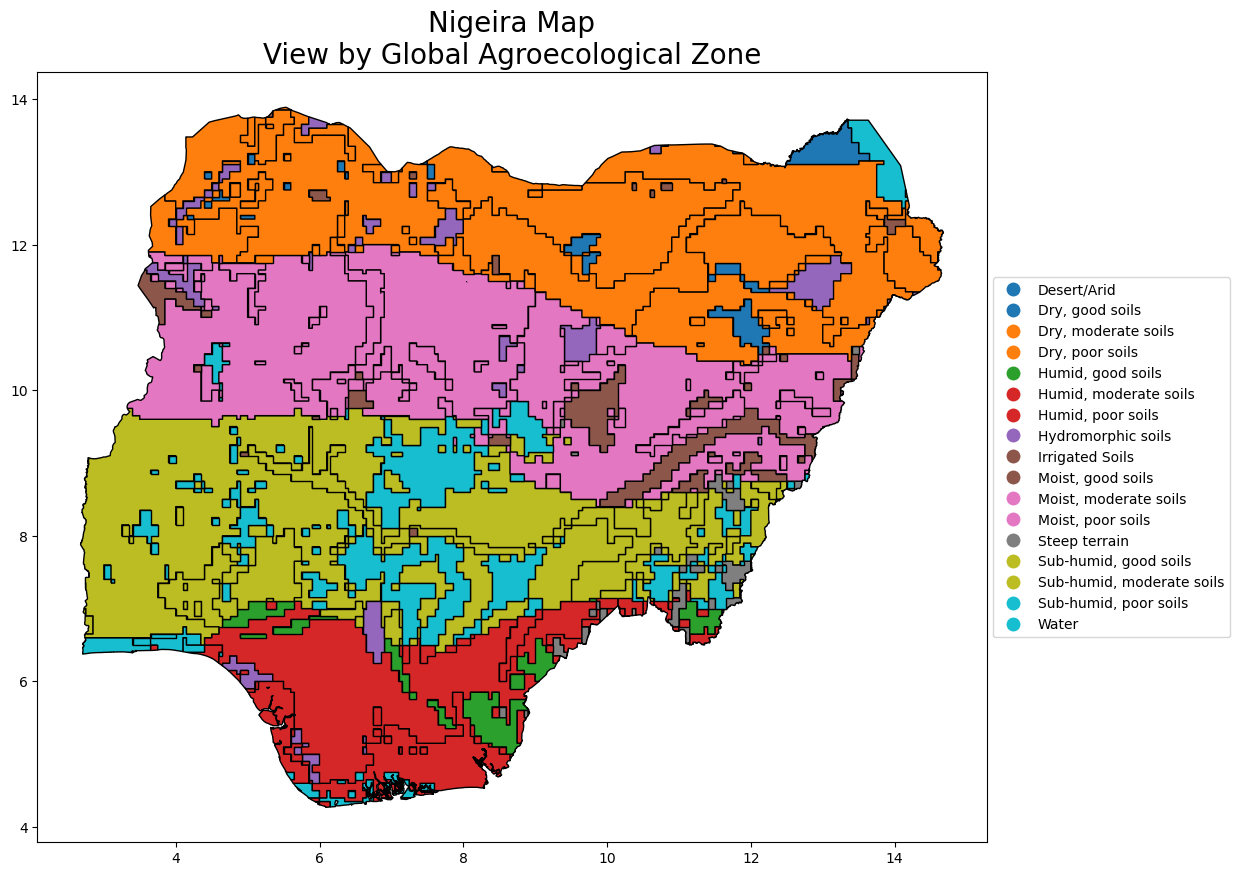

In [19]:
ax = nig_gaez.plot(figsize=(20,10), column= 'Value', cmap= 'tab10', 
                   edgecolor= 'black', legend= True, 
                   legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_title('Nigeira Map\nView by Global Agroecological Zone', fontsize=20)
plt.show()

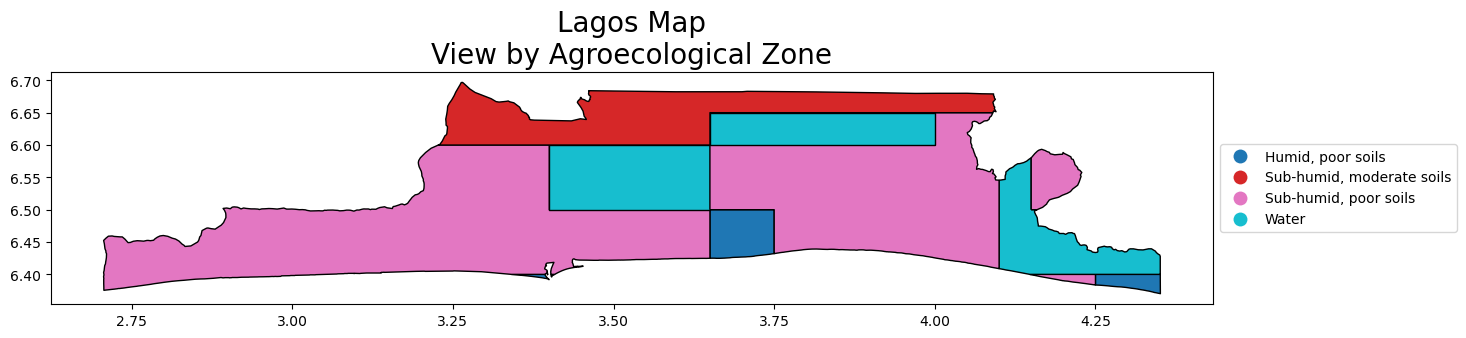

In [20]:
ax = lg_gaez.plot(figsize=(15,5), column= 'Value', cmap= 'tab10', 
                   edgecolor= 'black', legend= True, 
                   legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_title('Lagos Map\nView by Agroecological Zone', fontsize=20)
plt.show()

Lagos state has the folowing agroecological zone:
> Humid, poor soils

> Water

> Sub-humid, poor soils

> Sub-humid, moderate soils

### Ecological Zone

In [21]:
lg_gez = nig_gez.clip(lg_boundary)

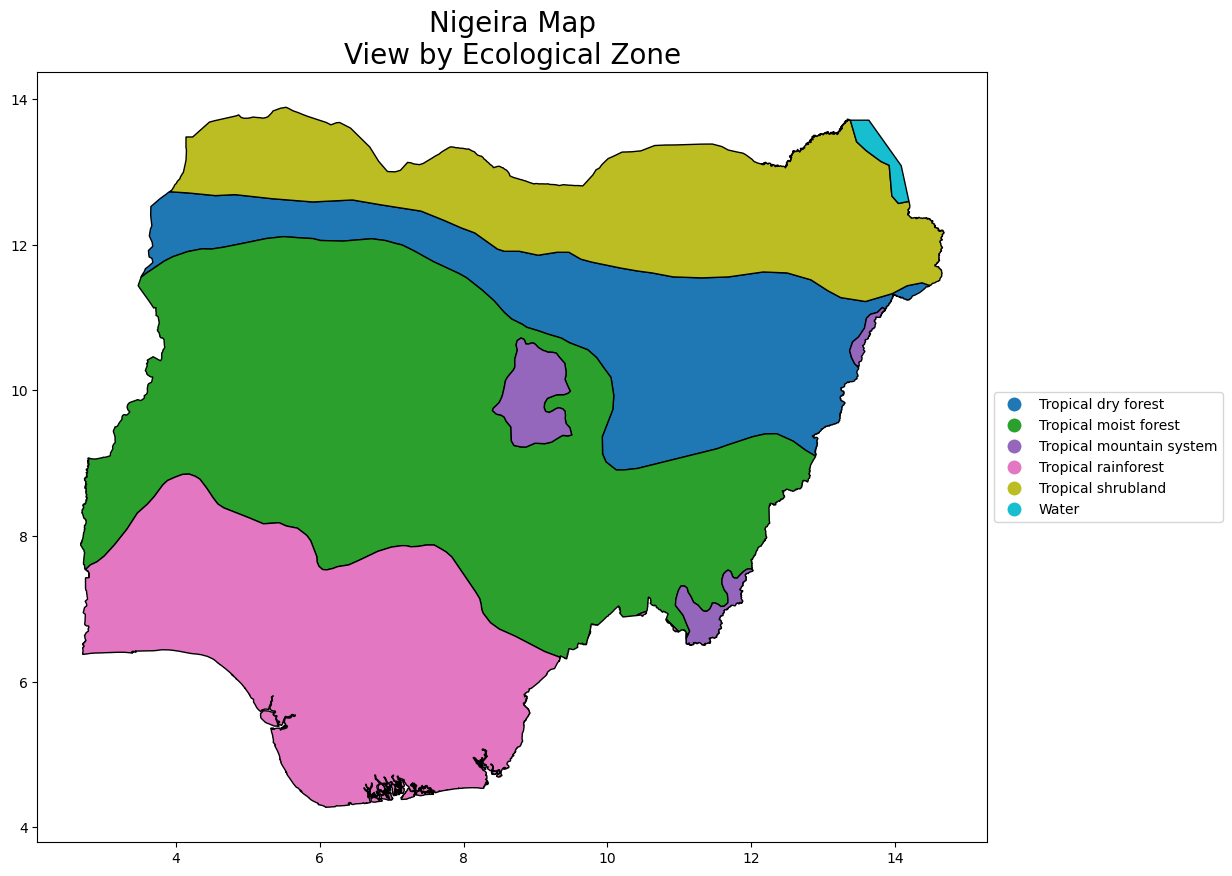

In [22]:
ax = nig_gez.plot(figsize=(20,10), column= 'gez_name', cmap= 'tab10', 
                   edgecolor= 'black', legend= True, 
                   legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_title('Nigeira Map\nView by Ecological Zone', fontsize=20)
plt.show()

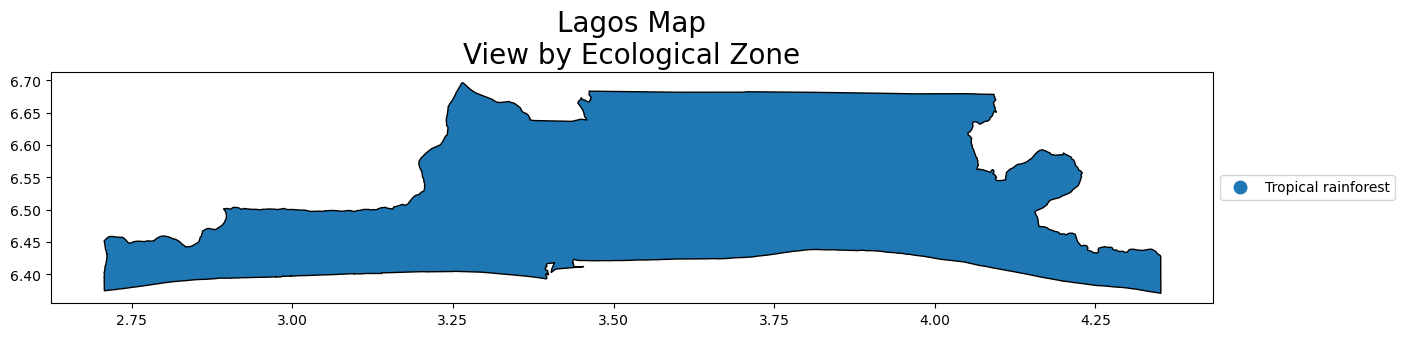

In [23]:
ax = lg_gez.plot(figsize=(15,5), column= 'gez_name', cmap= 'tab10', 
                   edgecolor= 'black', legend= True, 
                   legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_title('Lagos Map\nView by Ecological Zone', fontsize=20)
plt.show()

> Lagos State's ecological zone, situated within the tropical rainforest, is marked by lush vegetation and high rainfall.

### Soil Resources

In [24]:
lg_wsr = nig_wsr.clip(lg_boundary)

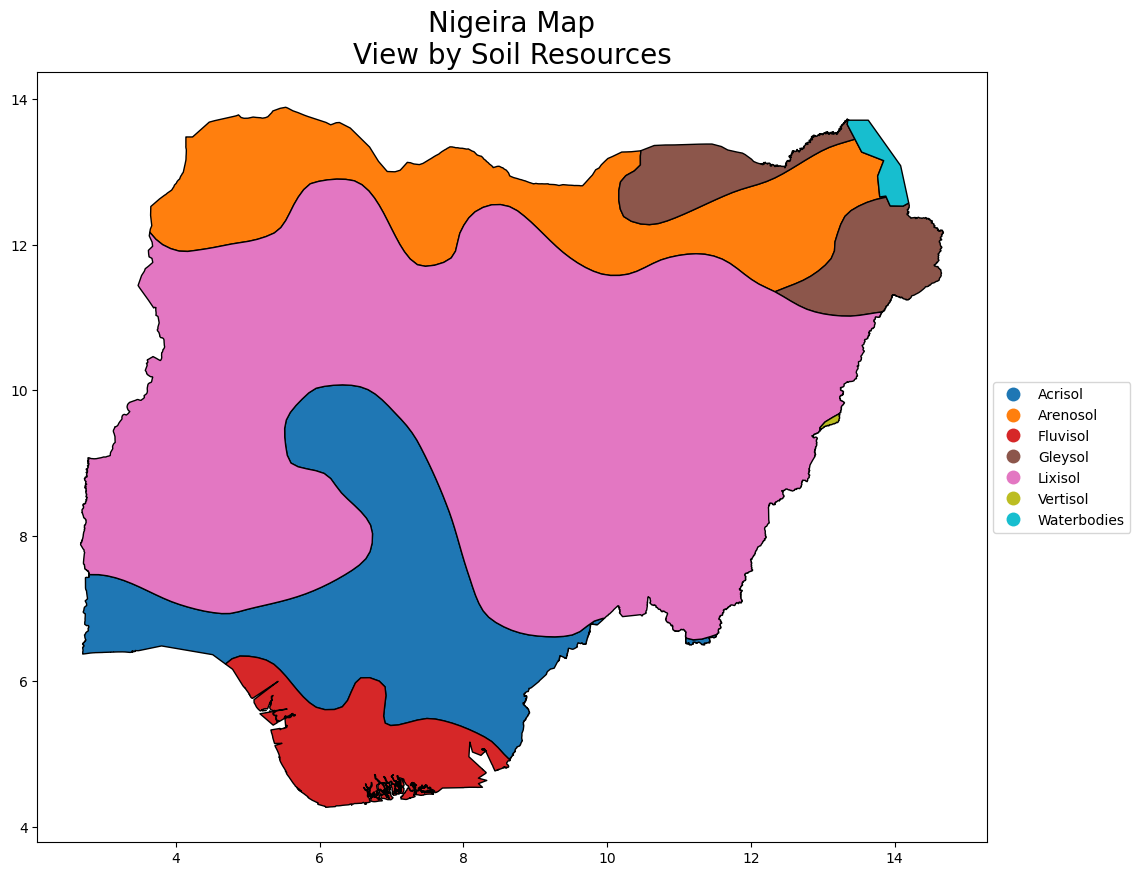

In [25]:
ax = nig_wsr.plot(figsize=(20,10), column= 'IPCC', cmap= 'tab10', 
                   edgecolor= 'black', legend= True, 
                   legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_title('Nigeira Map\nView by Soil Resources', fontsize=20)
plt.show()

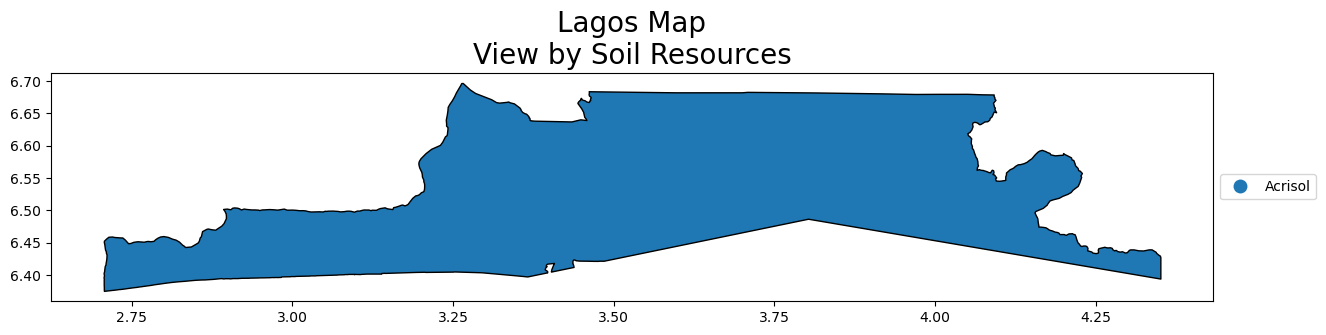

In [26]:
ax = lg_wsr.plot(figsize=(15,5), column= 'IPCC', cmap= 'tab10', 
                   edgecolor= 'black', legend= True, 
                   legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_title('Lagos Map\nView by Soil Resources', fontsize=20)
plt.show()